# Aprendizaje No Supervisado

## Clustering

### K-Means en 2D

c:\Users\Personal\anaconda3\envs\iacourse\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


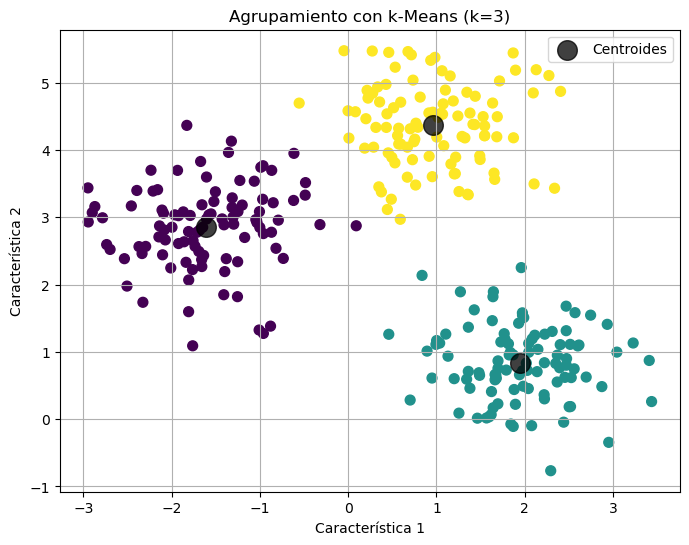

Puntaje Silhouette: 0.660


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Generar un conjunto de datos 2D simulado con 3 centros
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=0)

# 2. Crear y ajustar el modelo k-Means
k = 3
modelo = KMeans(n_clusters=k, random_state=0)
y_kmeans = modelo.fit_predict(X)

# 3. Visualizar los clusters encontrados
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(modelo.cluster_centers_[:, 0], modelo.cluster_centers_[:, 1], c='black', s=200, alpha=0.75, label='Centroides')
plt.title("Agrupamiento con k-Means (k=3)")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.legend()
plt.grid(True)
plt.show()

# 4. Evaluar la calidad del clustering con Silhouette Score
sil_score = silhouette_score(X, y_kmeans)
print(f"Puntaje Silhouette: {sil_score:.3f}")

### K-Means aplicado al dataset Iris

Agrupar las muestras de flores del dataset Iris en 3 clusters, y comparar estos grupos con las clases reales (solo para análisis, no para entrenar).

- El dataset de Iris contiene 150 observaciones y 4 características: sepal length, sepal width, petal length, petal width
- Tres clases reales: setosa, versicolor, virginica

c:\Users\Personal\anaconda3\envs\iacourse\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.551
Adjusted Rand Index (comparado con las clases reales): 0.716


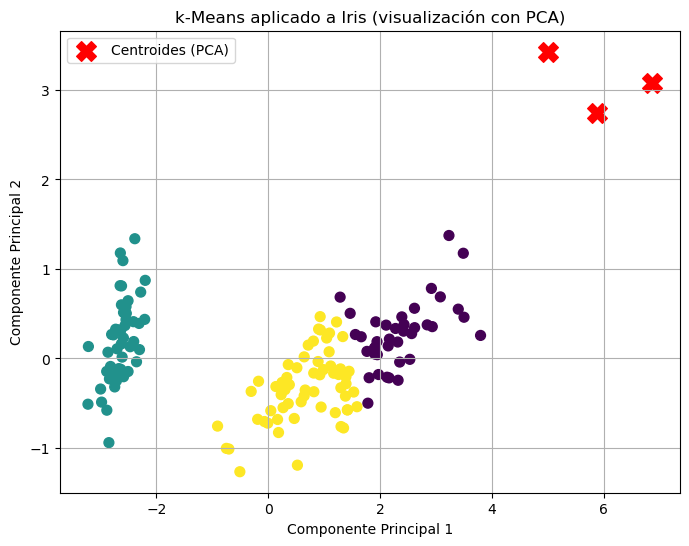

In [13]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# 1. Cargar datos (sin usar las etiquetas para entrenar)
iris = load_iris()
X = iris.data
y_true = iris.target  # Solo para análisis comparativo

# 2. Aplicar k-Means
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# 3. Evaluar el resultado
sil_score = silhouette_score(X, y_kmeans)
ari_score = adjusted_rand_score(y_true, y_kmeans)

print(f"Silhouette Score: {sil_score:.3f}")
print(f"Adjusted Rand Index (comparado con las clases reales): {ari_score:.3f}")

# 4. Visualizar con reducción de dimensionalidad (PCA a 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap="viridis", s=50)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    c="red",
    s=200,
    marker="X",
    label="Centroides (PCA)",
)
plt.title("k-Means aplicado a Iris (visualización con PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(loc="best")
plt.grid(True)
plt.show()